In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data,y = make_blobs(n_samples=1000,n_features=2,centers=4,cluster_std=0.5)

In [4]:
data

array([[10.19340028, -4.34842099],
       [-1.25350171, -8.17112145],
       [ 7.56949081,  8.03576669],
       ...,
       [-1.16154806, -7.53866019],
       [-0.68126841, -8.56483027],
       [ 7.0394399 ,  7.5065461 ]])

In [5]:
centroids = data[np.random.choice(range(data.shape[0]),size=(4,))]

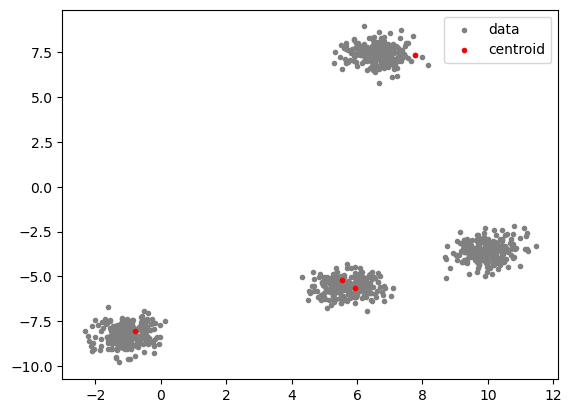

In [6]:
plt.scatter(data[:,0],data[:,1],marker='.',color='grey',label='data')
plt.scatter(centroids[:,0],centroids[:,1],marker='.',color='red',label='centroid')
plt.legend()

In [7]:
data

array([[10.19340028, -4.34842099],
       [-1.25350171, -8.17112145],
       [ 7.56949081,  8.03576669],
       ...,
       [-1.16154806, -7.53866019],
       [-0.68126841, -8.56483027],
       [ 7.0394399 ,  7.5065461 ]])

In [13]:
data.shape

(1000, 2)

In [8]:
centroids

array([[-0.80336554, -8.04786688],
       [ 5.94742275, -5.62804307],
       [ 7.75963012,  7.32073412],
       [ 5.52791586, -5.17718181]])

In [9]:
for c in centroids:
    print(c)

[-0.80336554 -8.04786688]
[ 5.94742275 -5.62804307]
[7.75963012 7.32073412]
[ 5.52791586 -5.17718181]


In [49]:
centroids[0]

array([-8.3691214 , -8.11349051])

In [48]:
((data[0] - centroids[0])**2)**0.5

array([ 1.92066467, 11.07181232])

In [56]:
d = ((((data - centroids[0])**2).sum(axis=1))**0.5).reshape(-1,1)

In [18]:
def euclidian(data,centroid):
    dist = np.array([]).reshape(len(data),0)
    for c in centroids:
        distance = (((data - c)**2).sum(axis=1)**0.5).reshape(-1,1)
        dist = np.hstack([dist,distance])
    return dist

def get_closest_centroid(data,centroid):
    dist = euclidian(data,centroid)
    closes_indx = np.argmin(dist,axis=1)
    return closes_indx

In [19]:
dist = get_closest_centroid(data,centroids)

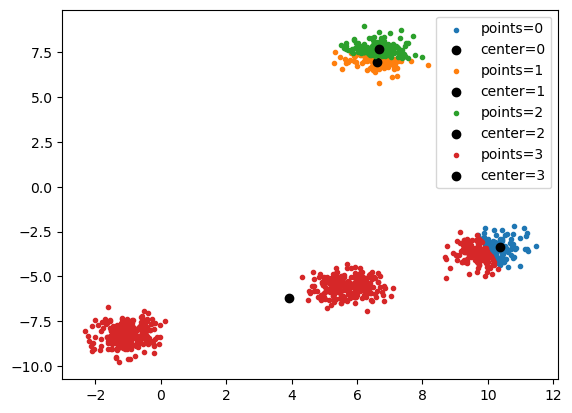

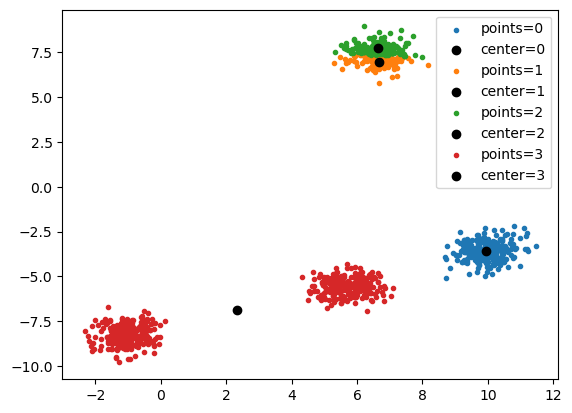

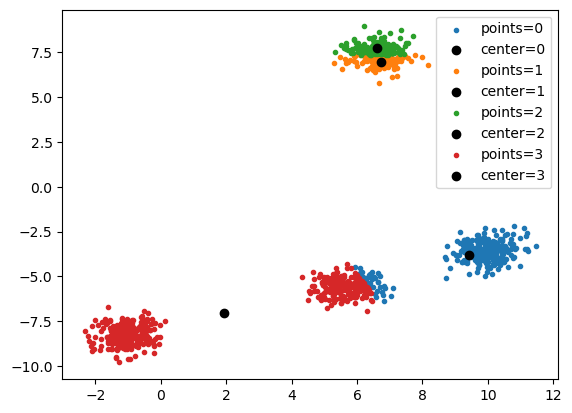

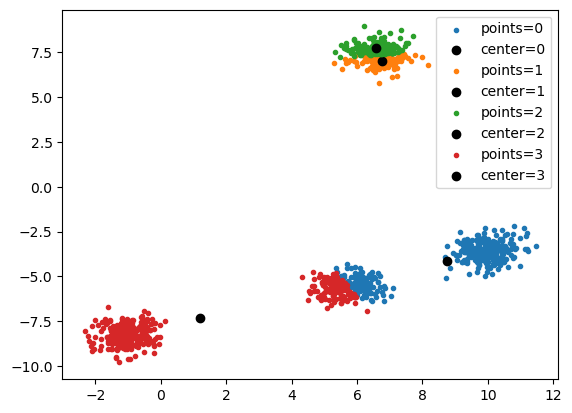

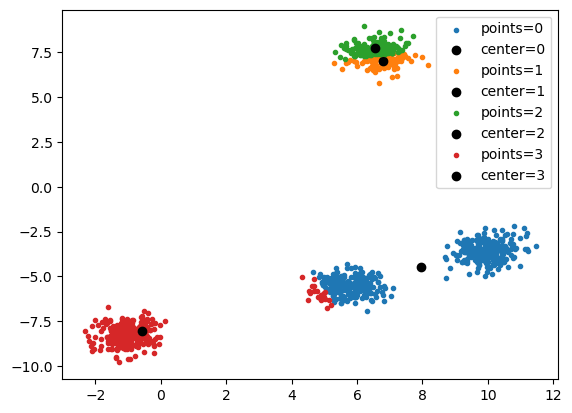

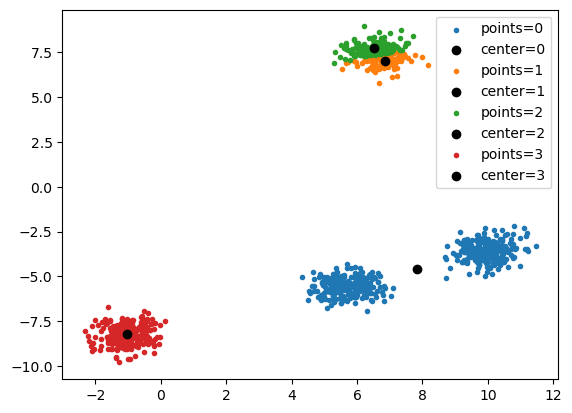

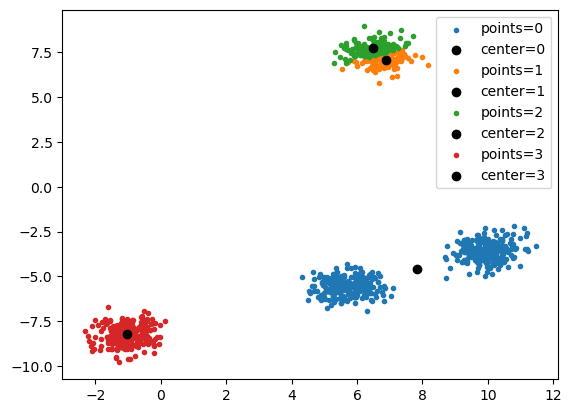

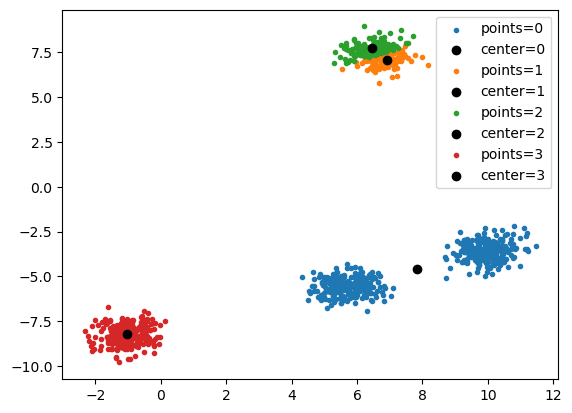

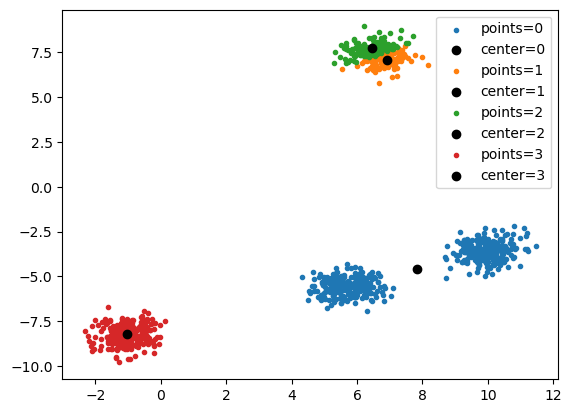

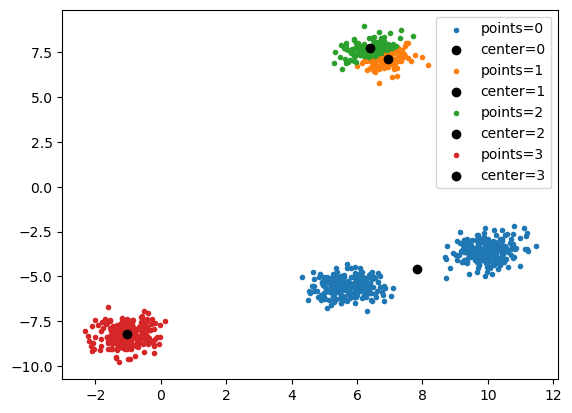

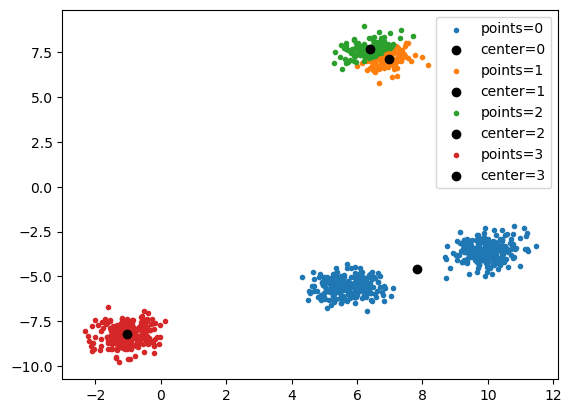

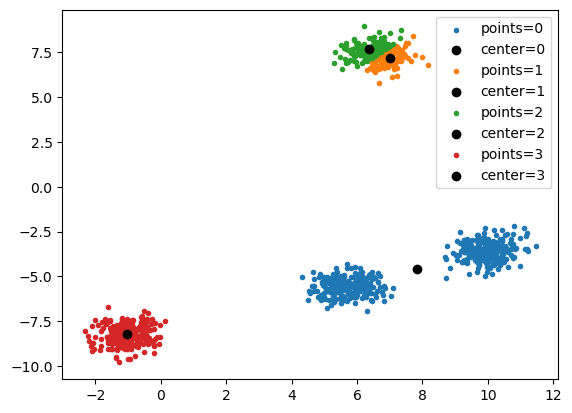

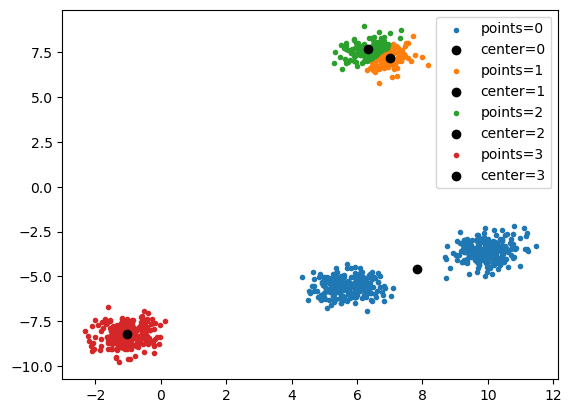

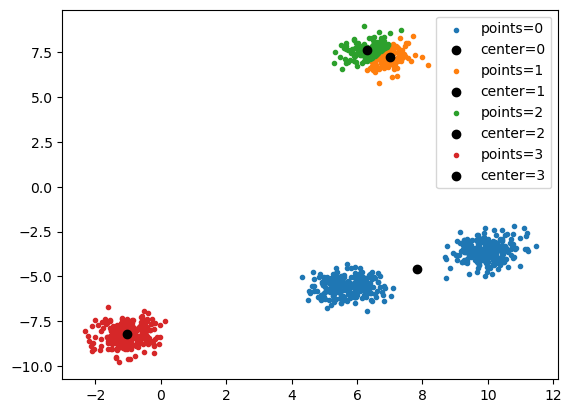

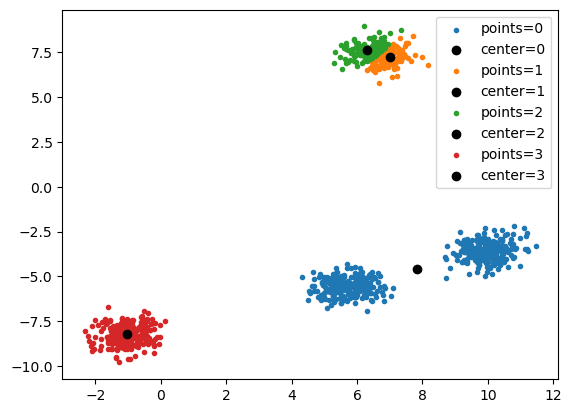

In [20]:
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

# Create a list to store which centroid is assigned to each dataset
assigned_centroids = np.zeros(len(data), dtype = np.int32)

for n in range(15):
    closest_centroid = get_closest_centroid(data,centroids)
    
    assigned_centroid = closest_centroid
    
    for c in range(len(centroids)):
        cluster_data = data[assigned_centroid==c]
        new_centroid = cluster_data.mean(axis=0)
        centroids[c] = new_centroid
        plt.scatter(cluster_data[:,0],cluster_data[:,1],marker='.',label = f'points={c}')
        plt.scatter(centroids[c][0],centroids[c][1],color='black',label = f'center={c}')
    plt.legend()
    plt.show()

In [47]:
from sklearn.metrics import pairwise_distances_argmin_min

x,y = make_blobs(n_samples=300,centers=2)
n_cluster = 3

# K-Mean ++ from scratch

`Approach`

1. First select a random center points.

2. Choose next centroid using probablity distance.

3.  Update your centroid based on distance probablity.

4. run k-means on above centroids.

In [66]:
def kmean_plus_plus(x,n_centers):
    centroids = [x[np.random.choice(x.shape[0])]]

    for _ in range(1,n_centers):
        distance = pairwise_distances_argmin_min(x,centroids,metric='euclidean')[1]
        probability = distance**2/np.sum(distance**2)
        next_centroid = x[np.random.choice(x.shape[0],p=probability)]
        centroids.append(next_centroid)
    return centroids



def kmeans(x,n_cluster,max_iter=100):
    centroids = kmean_plus_plus(x,n_cluster)

    for _ in range(max_iter):
        distance = np.linalg.norm(x[:,np.newaxis]-centroids,axis=2)
        labels = np.argmin(distance,axis=1)
        new_centroid = np.array([x[labels==i].mean(axis=0) for i in range(n_cluster)])

        if np.all(centroids == new_centroid):
            break
        centroids = new_centroid

    return labels,centroids


kmeans(x,n_cluster)
    

(array([2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 2, 2, 1,
        0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 0,
        0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2,
        0, 1, 2, 0, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
        2, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
        1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0,
        1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0,
        2, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 

In [70]:
np.random.choice(x.shape[0],n_cluster,replace=True)

array([ 69, 139,  88])

# K-mediods implementation

`Approach`

1. Choose random mediods without replacement.

2. get the distance of points with mediods.

3. get label using argmin

4. get distance of point within cluster to get closes point to mediod for finding new mediod.

5. update.



In [ ]:
new_medoids = np.array([x[labels == i][np.argmin(np.sum(np.linalg.norm(x[labels == i] - x[labels == i][:, np.newaxis], axis=2), axis=1))] for i in range(n_clusters)])


In [89]:
medoids = x[np.random.choice(x.shape[0],n_cluster,replace=False)]

for _ in range(100):
    distance = np.linalg.norm(x[:,np.newaxis]-medoids,axis=2)
    labels = np.argmin(distance,axis=1)
    new_medoids = np.array([x[labels == i][np.argmin(np.sum(np.linalg.norm(x[labels == i] - x[labels == i][:, np.newaxis], axis=2), axis=1))] for i in range(n_cluster)])
    if(np.all(medoids==new_medoids)):
        break
    mediods = new_medoids
print(labels,medoids)

[1 0 0 2 0 2 2 1 2 1 0 1 1 1 0 1 0 2 0 1 1 1 2 1 2 0 1 2 0 0 1 2 2 0 0 1 1
 1 2 1 1 1 0 2 2 1 0 0 0 1 0 0 1 2 0 2 1 2 1 0 1 1 1 2 2 1 2 1 1 2 2 1 0 1
 2 1 1 1 1 1 1 1 0 0 2 1 1 0 1 2 0 2 2 2 1 2 1 1 1 0 1 1 2 2 1 1 1 1 1 1 1
 0 1 1 1 2 0 1 2 0 1 1 2 1 2 0 0 2 2 2 1 2 1 0 1 1 1 1 2 1 1 1 1 0 0 2 1 2
 1 0 0 2 2 0 2 2 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 2 1 1 1
 2 0 1 0 0 2 0 0 0 2 1 1 0 1 2 2 1 1 1 1 1 1 0 1 0 1 1 2 1 2 2 0 1 2 2 0 2
 1 1 0 1 0 0 0 0 1 2 2 1 0 2 1 1 2 1 0 2 1 2 1 1 1 1 1 0 1 1 1 0 2 1 1 0 1
 1 1 1 1 0 1 0 2 1 1 0 1 1 0 1 0 2 1 1 0 1 2 2 2 2 1 0 1 2 1 0 0 2 1 1 1 1
 0 1 1 1] [[-5.25324801 -6.69325934]
 [-2.40491487 -1.10086221]
 [-4.87076839 -5.95724171]]


# Elbow methods using wcss 

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow method with WCSS (inertia)

c:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

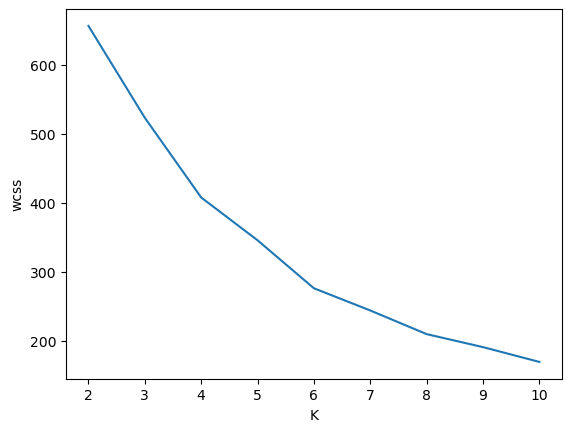

In [96]:
wcss=[]
k_value = range(2,11)

for k in k_value:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(k_value,wcss)
plt.xlabel('K')
plt.ylabel('wcss')
plt.show()

# Elbow with silhoutte score

c:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

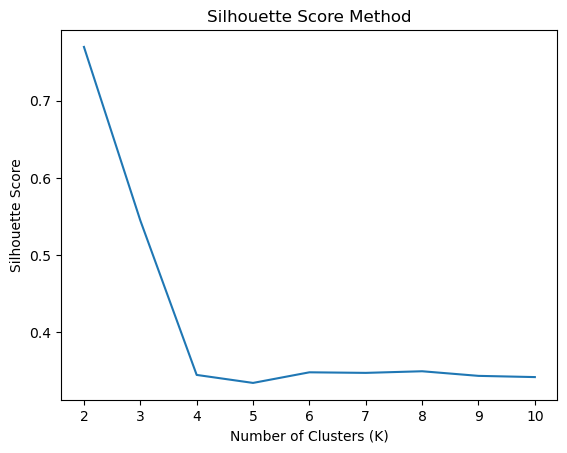

In [100]:
sil_score=[]
for k in k_value:
    kmeans = KMeans(n_clusters=k,random_state=42)
    labels = kmeans.fit_predict(x)
    sil_scores = silhouette_score(x,labels)
    sil_score.append(sil_scores)
plt.plot(k_value,sil_score)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()
